## Ejercicios del libro http://www.nltk.org/book

# 1. Language Processing and Python

In [1]:
import nltk


In [ ]:
nltk.download()


In [2]:
from nltk.book import *


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [19]:
# La opción para obtener la lista de textos cargados.
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Buscando Texto

In [3]:
# concordance :: Buscando fragmentos donde aparece una palabra clave
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [30]:
# Creo que proporciona las palabras que enmarcan los contextos en los que es utilizada la palabra indicada.
# Podría tomarse como un resumen de cómo se está utilizando esa palabra dentro del texto.
text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [31]:
text2.concordance('monstrous')

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [32]:
text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [39]:
# Proporciona el resultado del contexto exacto en el que do o más palabras existen en todo el texto estudiado.
text1.common_contexts(['monstrous','true'])

the_pictures


In [40]:
text2.common_contexts(['monstrous','very'])

a_pretty am_glad a_lucky is_pretty be_glad


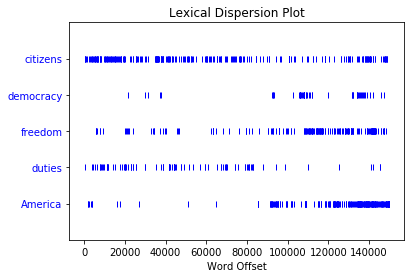

In [41]:
# Gráfica de dispersión (dispersion plot)
# Podemos utilizarla para saber cuantas veces aparece una palabra en particular en todo el texto, 
# así como otras palabras que aparecen en el mismo contexto
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [42]:
text3.generate()

Building ngram index...


laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

### Counting vocabulary

In [45]:
#Número de palabras (tokens)
len(text3)

44764

In [48]:
# Número de tokens únicos
# Set: obtiene una lista de tokens únicos
# Sorted: ordena una lista
len(sorted(set(text3)))

2789

In [55]:
# Measure of the lexical richness of the text
# The next example shows us that the number of distinct words is just 6% of the total number of words
len(set(text3)) / len(text3)

0.06230453042623537

In [88]:
# Functions for check diversity of conjucntion
def lexical_diversity(text):
    return len(set(text))/len(text)

def percentage(count, total):
    return count / total * 100

In [101]:
type(text1)

nltk.text.Text

In [107]:
print(
    ('text1: ' + str(lexical_diversity(text1))), '\n',
    ('text2: ' + str(lexical_diversity(text2))), '\n',
    ('text3: ' + str(lexical_diversity(text3))), '\n',
    ('text4: ' + str(lexical_diversity(text4)))
)

text1: 0.07406285585022564 
 text2: 0.04826383002768831 
 text3: 0.06230453042623537 
 text4: 0.06617622515804722


In [ ]:
import pandas as pd

In [115]:
# ¿Puedo obtener la cantidad de apariciones de cada palabra?

def lexical_diversity_perWord(text):
    
    df = pd.DataFrame(columns = ['token', 'num_occurrences', 'percentage_occurrences'])
    num_occ = 0
    num_tot = len(text)

    for t in sorted(set(text)):
        num_occ = text.count(t)
        newRow = {'token':t, 'num_occurrences':num_occ, 'percentage_occurrences':percentage(num_occ, num_tot)}
        df = df.append(newRow, ignore_index = True)

    df.sort_values(by='num_occurrences', ascending=[False], inplace = True)
    
    return df

<class 'pandas.core.frame.DataFrame'>


In [135]:
df.style.set_caption('Lexical diversity for Text1')
df = pd.DataFrame(lexical_diversity_perWord(text1))
df.head(100)

print(df.head(50))

       token num_occurrences  percentage_occurrences
34         ,           18713                7.174707
17349    the           13721                5.260736
52         .            6862                2.630943
12890     of            6536                2.505952
4197     and            6024                2.309648
3761       a            4569                1.751790
17563     to            4542                1.741438
262        ;            4072                1.561236
10567     in            3916                1.501424
17347   that            2982                1.143322
18         '            2684                1.029066
44         -            2552                0.978456
10144    his            2459                0.942799
11078     it            2209                0.846947
1788       I            2124                0.814358
15201      s            1739                0.666746
11062     is            1695                0.649876
9960      he            1661                0.

## 3   Computing with Language: Simple Statistics

In [128]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens
#tokens[-2:]


['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']

### 3.1   Frequency Distributions

In [139]:
# Obtener la lista de frecuencias de cada palabra
fdist1 = FreqDist(sorted(text1))
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [140]:
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

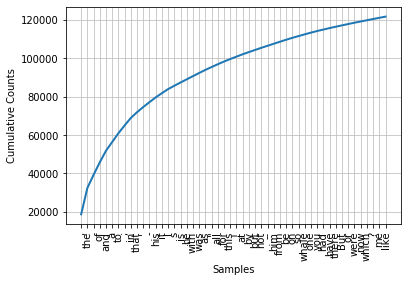

In [141]:
# Gráfica de distribución
fdist1.plot(50, cumulative = True)

In [143]:
# Lista de palabras que aparecen una sola vez
fdist1.hapaxes()
print(len(fdist1.hapaxes()))

9002


### 3.2   Fine-grained Selection of Words (Selección detallada de palabras)

In [147]:
# Buscando las palabras conformadas con mínimo 15 caracteres
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [148]:
# Obteniendo las palabras largas que aparecen frecuentemente
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)


['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

### 3.3   Collocations and Bigrams

In [152]:
# Se trata de una combinación de palabras que aparecen juntas a menudo
# Por ejemplo: vino tinto es una colocación (collocation), pero "el vino" no lo es.
# ¿Cómo le hace? Una característica de las colocaciones es que son resistentes a la sustitución por palabras que tienen significados similares.
text1.collocation_list()

['Sperm Whale',
 'Moby Dick',
 'White Whale',
 'old man',
 'Captain Ahab',
 'sperm whale',
 'Right Whale',
 'Captain Peleg',
 'New Bedford',
 'Cape Horn',
 'cried Ahab',
 'years ago',
 'lower jaw',
 'never mind',
 'Father Mapple',
 'cried Stubb',
 'chief mate',
 'white whale',
 'ivory leg',
 'one hand']

In [154]:
text4.collocation_list()

['United States',
 'fellow citizens',
 'four years',
 'years ago',
 'Federal Government',
 'General Government',
 'American people',
 'Vice President',
 'God bless',
 'Chief Justice',
 'Old World',
 'Almighty God',
 'Fellow citizens',
 'Chief Magistrate',
 'every citizen',
 'one another',
 'fellow Americans',
 'Indian tribes',
 'public debt',
 'foreign nations']

### 3.4   Counting Other Things

In [157]:
# Analizando la distribución de frecuencias pero en vez de usar palabras, usar longitud de palabras
fdist = FreqDist([len(w) for w in text1])
print(fdist)
fdist

<FreqDist with 19 samples and 260819 outcomes>


FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [158]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [159]:
fdist.freq(3)

0.19255882431878046

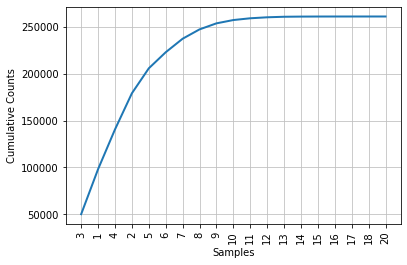

In [161]:
fdist.plot(cumulative = True)

In [162]:
fdist.tabulate()

    3     1     4     2     5     6     7     8     9    10    11    12    13    14    15    16    17    18    20 
50223 47933 42345 38513 26597 17111 14399  9966  6428  3528  1873  1053   567   177    70    22    12     1     1 


## 4   Back to Python: Making Decisions and Taking Control

Algunas funciones para textos:

| Function | Description |
| :- | -: |
| s.startswith(t) | test if s starts with t |
| s.endswith(t) | test if s ends with t |
| t in s | test if t is a substring of s |
| s.islower() | test if s contains cased characters and all are lowercase |
| s.isupper() | test if s contains cased characters and all are uppercase |
| s.isalpha() | test if s is non-empty and all characters in s are alphabetic |
| s.isalnum() | test if s is non-empty and all characters in s are alphanumeric |
| s.isdigit() | test if s is non-empty and all characters in s are digits |
| s.istitle() | test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) |

# 4.1   Conditionals

In [164]:
# Buscando palabras que terminan con 'ableness'
sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [165]:
# Buscando palabras que contengan 'gnt'
sorted(term for term in set(text4) if 'gnt' in term)

['Sovereignty', 'sovereignties', 'sovereignty']

In [166]:
# Buscando títulos (La primera letra es mayúscula o todo el texto son mayúsculas)
sorted(item for item in set(text6) if item.istitle())

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African',
 'Ages',
 'Aggh',
 'Agh',
 'Ah',
 'Ahh',
 'Alice',
 'All',
 'Allo',
 'Almighty',
 'Alright',
 'Am',
 'Amen',
 'An',
 'Anarcho',
 'And',
 'Angnor',
 'Anthrax',
 'Antioch',
 'Anybody',
 'Anyway',
 'Apples',
 'Aramaic',
 'Are',
 'Arimathea',
 'Armaments',
 'Arthur',
 'As',
 'Ask',
 'Assyria',
 'At',
 'Attila',
 'Augh',
 'Autumn',
 'Auuuuuuuugh',
 'Away',
 'Ay',
 'Ayy',
 'B',
 'Back',
 'Bad',
 'Badon',
 'Battle',
 'Be',
 'Beast',
 'Bedevere',
 'Bedwere',
 'Behold',
 'Between',
 'Beyond',
 'Black',
 'Bloody',
 'Blue',
 'Bon',
 'Bones',
 'Book',
 'Bors',
 'Brave',
 'Bravely',
 'Bravest',
 'Bread',
 'Bridge',
 'Bring',
 'Bristol',
 'Britain',
 'Britons',
 'Brother',
 'Build',
 'Burn',
 'But',
 'By',
 'C',
 'Caerbannog',
 'Camaaaaaargue',
 'Camelot',
 'Castle',
 'Chap

In [168]:
# Buscando dígitos
sorted(item for item in set(sent7) if item.isdigit())

['29', '61']

In [170]:
# Buscando tokens que contienen el caracter - así como la subcadena 'index'
sorted(w for w in set(text7) if '-' in w and 'index' in w)

<Text: Wall Street Journal>


['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [171]:
# Obtengo las palabras con formato de título y con longitus mayor a 10 caracteres
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)

['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

In [172]:
# Obtengo las palabras que no están en minúsculas
sorted(w for w in set(sent7) if not w.islower())

[',', '.', '29', '61', 'Nov.', 'Pierre', 'Vinken']

In [173]:
# Obtengo las palablras que contienen 'cie' o 'cei'
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

### 4.2   Operating on Every Element

In [7]:
[[w, len(w)] for w in text1[:10]]

[['[', 1],
 ['Moby', 4],
 ['Dick', 4],
 ['by', 2],
 ['Herman', 6],
 ['Melville', 8],
 ['1851', 4],
 [']', 1],
 ['ETYMOLOGY', 9],
 ['.', 1]]

In [18]:
# Reduciendo la cantidad de tokens homologandolos a minúsculas
print('Longitud de caracteres en Text1: ' + str(len(text1)) + '\n',
      'Tokens: ' + str(len(set(text1))) + '\n',
      'Tokens homologados a minúsculas: ' + str(len(set(w.lower() for w in text1)))
     )

Longitud de caracteres en Text1: 260819
 Tokens: 19317
 Tokens homologados a minúsculas: 17231


In [19]:
# Para eliminar datos numéricos
print(
    'Tokens homologados a minúsculas sin números ni símbolos de puntuación: ' + 
    str(len(set(w.lower() for w in text1 if w.isalpha())))
)

Tokens homologados a minúsculas sin números ni símbolos de puntuación: 16948


## 5   Automatic Natural Language Understanding

### 5.5   Spoken Dialog Systems

In [22]:
nltk.chat.suntsu.suntsu_chat()


Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
You seek enlightenment?
>Yes
Just as water retains no constant shape, so in warfare there are no constant conditions.
>What could tell me about work very hard?
Please consider whether you can answer your own question.
>What could tell me about love?
Ask me no questions!
>I think love is wonderfull.
It is the rule in war, if our forces are ten to the enemy's one, to surround him; if five to one, to attack him; if twice as numerous, to divide our army into two.
>quit


KeyboardInterrupt: 

In [23]:
nltk.chat.eliza.eliza_chat()


Therapist
---------
Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
Hello.  How are you feeling today?
>Good. And you?
Perhaps the answer lies within yourself?
>Good, thanks
Please tell me more.
>Today was a very hard day. I have stomachake
How do you feel when you say that?
>Ok
I see.  And what does that tell you?
>Nothing
Let's change focus a bit... Tell me about your family.
>I have a child. He is 6
Have you really a child. he is 6?
>Yes
OK, but can you elaborate a bit?
>quit
Good-bye.
